In [50]:
# Libraries to be imported for EDA 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

## Models for the splitting the samples into train_test
from sklearn.model_selection import train_test_split
from sklearn import model_selection

## Models for Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics


# Model Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Standard Scaler
from sklearn.preprocessing import StandardScaler

# Importing ignoring system warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import linear_model, datasets
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score




# Model Optimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [51]:
## Importing and checking the takehome users data file
df_raw=pd.read_csv("I:/relax_challenge/takehome_user_engagement.csv")
df_raw.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [52]:
## Checking the row count for the file 
df_raw.count()

time_stamp    207917
user_id       207917
visited       207917
dtype: int64

In [53]:
## Importing and checking the other takehome users file and checking the file. 
df_raw2=pd.read_csv("I:/relax_challenge/takehome_users.csv", encoding = "ISO-8859-1")
df_raw2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [54]:
## Renaming the column object id to merge the files when ready. 
df_raw2=df_raw2.rename(columns={'object_id':'user_id'})
df_raw2.head(3)
                               

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0


In [55]:
## File check 
df_raw2.count()

user_id                       12000
creation_time                 12000
name                          12000
email                         12000
creation_source               12000
last_session_creation_time     8823
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
invited_by_user_id             6417
dtype: int64

In [56]:
## Importing and quick Pandas Profile report the the datafile 2
import pandas_profiling
pandas_profiling.ProfileReport(df_raw2)

Number of variables,10
Number of observations,12000
Total Missing (%),7.3%
Total size in memory,937.6 KiB
Average record size in memory,80.0 B
Numeric,4
Categorical,4
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [57]:
## Converting the timestamp attribute to a timestamp for analysis
df_raw['timestamp'] = pd.to_datetime (df_raw['time_stamp'])
df_raw.head()

,time_stamp,user_id,visited,timestamp
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04


In [58]:
## Creating the day, week and month attributes for the timestamp attribute
df_raw['day']=df_raw['timestamp'].dt.day
df_raw['week']=df_raw['timestamp'].dt.week
df_raw['month']=df_raw['timestamp'].dt.month
df_raw.head()

,time_stamp,user_id,visited,timestamp,day,week,month
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,22,17,4
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,15,46,11
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,29,48,11
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,9,50,12
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,25,52,12


In [59]:
## Importing and quick Pandas Profile report the the datafile 1
pandas_profiling.ProfileReport(df_raw)

Number of variables,7
Number of observations,207917
Total Missing (%),0.0%
Total size in memory,11.1 MiB
Average record size in memory,56.0 B
Numeric,3
Categorical,1
Boolean,0
Date,1
Text (Unique),0
Rejected,2


In [196]:
## Exporting the pandas profile report
profile = pandas_profiling.ProfileReport(df_raw)
profile.to_file(outputfile="Downloads/report.html")

In [60]:
## Testing the group by function to determine the count by week per visitor
grp=df_raw.groupby(['user_id', 'week'])['visited'].count() 
grp.head()

user_id  week
1        17      1
2        1       1
         2       1
         6       3
         7       2
Name: visited, dtype: int64

In [61]:
## Checking the df data file and the created attributes
df=df_raw
df.head()

,time_stamp,user_id,visited,timestamp,day,week,month
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,22,17,4
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,15,46,11
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,29,48,11
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,9,50,12
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,25,52,12


In [62]:
## Reloading the takehome users data file to begin the analysis and parsing by dates for time_stamp
df = pd.read_csv("I:/relax_challenge/takehome_user_engagement.csv", parse_dates=['time_stamp'])

In [63]:
## Grouping by week and user id based on the time stamp and counting the freqency per week per user_id. 
## Filtering the week by three to separte the column into adopteduser
df['wk'] = df['time_stamp'].dt.week
df = df.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name="freq")

result = df[df.freq >= 3]

# only user ids matching criteria
user_ids = result.user_id.tolist()
print(user_ids)

[10, 42, 63, 69, 81, 82, 87, 146, 153, 160, 168, 197, 202, 203, 209, 230, 245, 263, 297, 310, 322, 445, 471, 483, 509, 510, 529, 535, 553, 564, 603, 605, 639, 669, 679, 680, 724, 728, 754, 772, 783, 804, 845, 882, 885, 901, 906, 912, 934, 937, 943, 980, 1017, 1018, 1027, 1055, 1061, 1072, 1094, 1099, 1128, 1129, 1155, 1196, 1202, 1280, 1320, 1339, 1343, 1345, 1350, 1357, 1368, 1407, 1411, 1421, 1434, 1464, 1472, 1476, 1479, 1485, 1507, 1576, 1617, 1624, 1665, 1693, 1709, 1730, 1754, 1769, 1781, 1783, 1786, 1811, 1821, 1822, 1836, 1865, 1879, 1885, 1941, 2002, 2011, 2013, 2033, 2042, 2074, 2078, 2080, 2103, 2113, 2159, 2171, 2193, 2246, 2253, 2270, 2271, 2286, 2289, 2300, 2316, 2324, 2333, 2339, 2390, 2406, 2425, 2447, 2474, 2490, 2502, 2519, 2539, 2548, 2557, 2566, 2568, 2571, 2604, 2620, 2622, 2647, 2658, 2672, 2723, 2727, 2739, 2744, 2771, 2809, 2832, 2881, 2889, 2895, 2915, 2939, 2979, 3017, 3028, 3032, 3039, 3066, 3067, 3087, 3093, 3112, 3113, 3137, 3139, 3160, 3175, 3180, 3185, 31

In [64]:
# list of tuples containing user_id and number times logged in.
p = [(x,y) for x,y in zip(result.user_id, result.freq) ]
print(p)

[(10, 5), (42, 4), (63, 7), (69, 10), (81, 3), (82, 4), (87, 4), (146, 3), (153, 7), (160, 4), (168, 9), (197, 6), (202, 3), (203, 7), (209, 4), (230, 7), (245, 5), (263, 6), (297, 7), (310, 4), (322, 6), (445, 11), (471, 3), (483, 4), (509, 5), (510, 9), (529, 3), (535, 7), (553, 6), (564, 4), (603, 11), (605, 8), (639, 7), (669, 4), (679, 9), (680, 4), (724, 5), (728, 12), (754, 9), (772, 9), (783, 9), (804, 3), (845, 3), (882, 3), (885, 5), (901, 5), (906, 12), (912, 4), (934, 8), (937, 3), (943, 3), (980, 3), (1017, 7), (1018, 3), (1027, 14), (1055, 8), (1061, 3), (1072, 7), (1094, 3), (1099, 4), (1128, 3), (1129, 3), (1155, 6), (1196, 3), (1202, 5), (1280, 5), (1320, 8), (1339, 6), (1343, 5), (1345, 5), (1350, 4), (1357, 3), (1368, 4), (1407, 8), (1411, 6), (1421, 4), (1434, 7), (1464, 8), (1472, 3), (1476, 3), (1479, 4), (1485, 4), (1507, 4), (1576, 3), (1617, 6), (1624, 4), (1665, 6), (1693, 7), (1709, 7), (1730, 4), (1754, 4), (1769, 12), (1781, 4), (1783, 6), (1786, 6), (1811,

In [65]:
## Creating a pandas df for columns user_id and week_visits
df2 = pd.DataFrame(p, columns=['user_id', 'week_visits'])
df2.head(3)

,user_id,week_visits
0,10,5
1,42,4
2,63,7


In [66]:
## Looking at the dataframe 
df2.describe()

,user_id,week_visits
count,29771.000000,29771.000000
mean,5927.866514,5.777266
std,3426.375568,2.603749
min,2.000000,3.000000
25%,3067.000000,4.000000
50%,5685.000000,5.000000
75%,9011.000000,7.000000
max,11988.000000,14.000000


In [67]:
## Grouping the user_id and summing the week_visits
grouped = df2.groupby('user_id').sum()

In [68]:
## looking at the type
type(grouped)

pandas.core.frame.DataFrame

In [69]:
## Chekcing the firss five entries
grouped.head()

,week_visits
user_id,
2,3
10,273
20,3
33,3
42,340


In [70]:
## Saving the df to a csv file for future use. 
submit=pd.DataFrame(data=df2)
submit.to_csv('13oct.csv',index=True)

In [71]:
## Making sure we have the correct number of rows. 
df_raw2.count()

user_id                       12000
creation_time                 12000
name                          12000
email                         12000
creation_source               12000
last_session_creation_time     8823
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
invited_by_user_id             6417
dtype: int64

In [72]:
## Left hand merge for the two csv files to begin the analysis. 
df3=pd.merge(df_raw2, grouped, on='user_id', how='left')
df3.head(5)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [73]:
## Checking the attributes for the new database
df3.describe()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000,1445.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145,119.027682
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968,140.198980
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000,11.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000,55.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000,191.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,606.000000


In [74]:
## Quick check for the top three rows. 
df3.head(3)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN


In [75]:
# Replacing the NAN values for the week_visits to 0
df3['week_visits'] = df3['week_visits'].replace(np.nan, 0)

In [76]:
## Checking the output
df3.head(5)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [77]:
## Changing the column name back to Object_id and checking the output
df3=df3.rename(columns={'user_id': 'object_id'})
df3.tail(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0.0
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN,0.0


In [78]:
## Creating another Binary Target for adopteduser or the target varible
df3["adopteduser"]=df3["week_visits"]
df3.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,3.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0.0


In [79]:
## Binning adopteduser into 0 or 1 for the target varible
df3.adopteduser[df3.week_visits >= 1] = "1"
df3.adopteduser[df3.week_visits < 1] = "0"
df3.head(3) 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0


In [80]:
## Creating a Bar Chart and Inferential Statistics for an individual attributes
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     12000
unique        2
top           0
freq      10555
Name: adopteduser, dtype: object
mode:  0    0
dtype: object
0    10555
1     1445
Name: adopteduser, dtype: int64


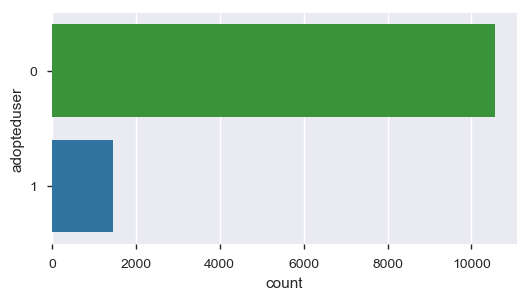

In [81]:
# Target Variable: adopteduser
count, ax = plt.subplots(figsize=(6,3))
c_palette = ['tab:green', 'tab:blue']
categorical_summarized(df3, y = 'adopteduser', palette=c_palette)
plt.show()

In [82]:
## Creating another mulitfactorial variable for the creation_source
df3["creation_source_t"]=df3["creation_source"]
df3.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser,creation_source_t
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,GUEST_INVITE
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1,ORG_INVITE
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,ORG_INVITE


In [83]:
## Binning the creation_source from text to a number for analysis
df3.creation_source_t[df3.creation_source == "ORG_INVITE"] = 1
df3.creation_source_t[df3.creation_source == "GUEST_INVITE"] = 2
df3.creation_source_t[df3.creation_source == "PERSONAL_PROJECTS"] = 3
df3.creation_source_t[df3.creation_source == "SIGNUP"] = 4
df3.creation_source_t[df3.creation_source == "SIGNUP_GOOGLE_AUTH"] = 5

In [84]:
## Testing the transformation
df3.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser,creation_source_t
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,2
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1


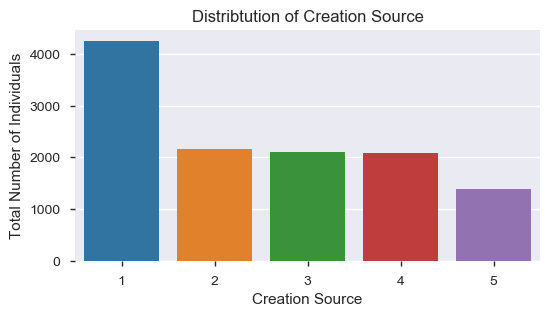

In [85]:
## Creating a countplot for the creation source
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('creation_source_t', data=df3)
ax.set_title('Distribtution of Creation Source')
ax.set_xlabel('Creation Source')
ax.set_ylabel('Total Number of Individuals')

plt.show()

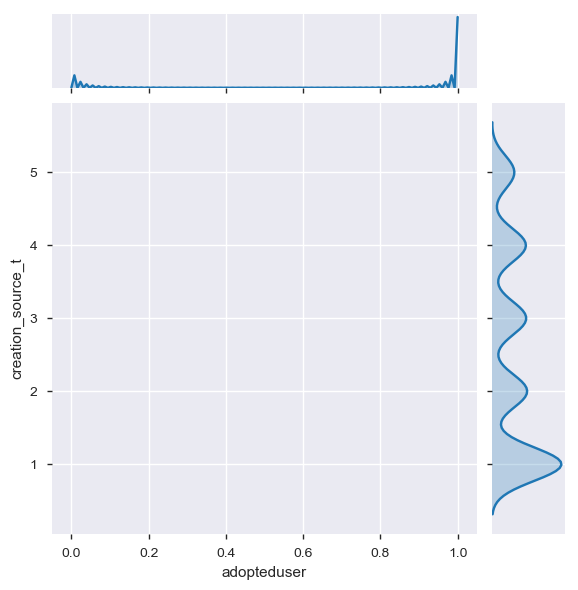

In [86]:
## Creating a kde Plot of the values for adopteduser and creation_source_t
sns.jointplot(x=df3["adopteduser"], y=df3["creation_source_t"], kind='kde')
plt.show()

In [87]:
# Cross Tabulation for Categorical Variable adopteduser and creation_source_t
ct1=pd.crosstab(df3.adopteduser, df3.creation_source_t, margins=True)
ct1.head()

creation_source_t,1,2,3,4,5,All
adopteduser,,,,,,
0,3763,1837,1964,1812,1179,10555
1,491,326,147,275,206,1445
All,4254,2163,2111,2087,1385,12000


In [88]:
## Creating another multifactorial input variable for creation_source and this will have three bins and not five. 
df3["creation_source_t2"]=df3["creation_source_t"]
df3.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser,creation_source_t,creation_source_t2
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,2,2
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1,1


In [89]:
## Binnng creation_source_t2 into three bins 
df3.creation_source_t2[df3.creation_source_t == 3] = 3
df3.creation_source_t2[df3.creation_source_t == 4] = 3
df3.creation_source_t2[df3.creation_source_t == 5] = 3

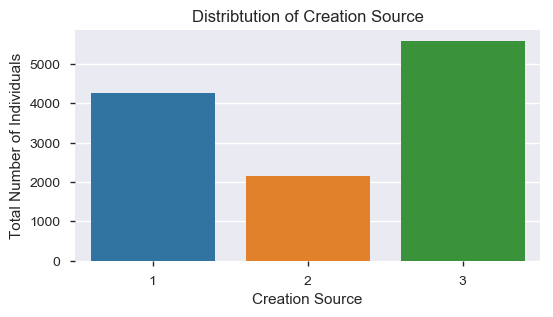

In [90]:
## Countplot for the creation_source_t2 attribute
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('creation_source_t2', data=df3)
ax.set_title('Distribtution of Creation Source')
ax.set_xlabel('Creation Source')
ax.set_ylabel('Total Number of Individuals')

plt.show()

In [91]:
## Replacing all NAN values with 0
df3['invited_by_user_id'] = df3['invited_by_user_id'].replace(np.nan, 0)

In [92]:
## Creating another binary variable for the invited_by_user_id into a 0 and 1 bin. 
df3["invited_by_user_id_t"]=df3["invited_by_user_id"]
df3.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser,creation_source_t,creation_source_t2,invited_by_user_id_t
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,2,2,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1,1,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1,1,1525.0


In [93]:
## Creating another binary variable for the invited_by_user_id into a 0 and 1 bin. 
df3.invited_by_user_id_t[df3.invited_by_user_id > 0] = 1
df3.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser,creation_source_t,creation_source_t2,invited_by_user_id_t
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,2,2,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1,1,1,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1,1,1.0


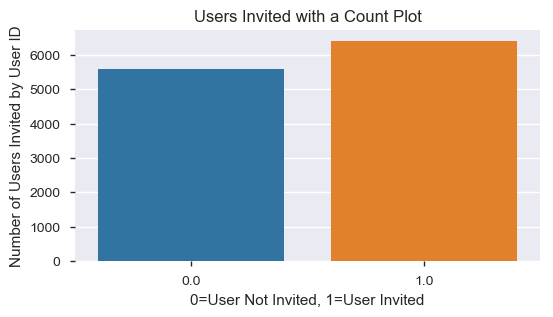

In [94]:
## Count plot for the invited_by_use_id_t
ount, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('invited_by_user_id_t', data=df3)
ax.set_title('Users Invited with a Count Plot')
ax.set_xlabel('0=User Not Invited, 1=User Invited')
ax.set_ylabel('Number of Users Invited by User ID')

plt.show()

In [95]:
## Column Check
df3.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'week_visits', 'adopteduser', 'creation_source_t', 'creation_source_t2',
       'invited_by_user_id_t'],
      dtype='object')

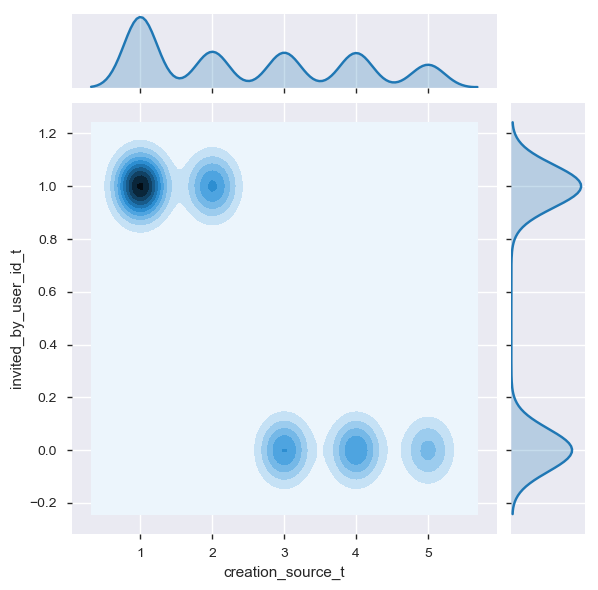

In [96]:
## Creating a kde Plot of the values for the creation_source_t and invited by user_id_t
sns.jointplot(x=df3["creation_source_t"], y=df3["invited_by_user_id_t"], kind='kde')
plt.show()

In [97]:
# Cross Tabulation for Categorical variable invited_by_user_id_t and creation_source_t

ct2=pd.crosstab(df3.invited_by_user_id_t, df3.creation_source_t, margins=True)
ct2.head()

creation_source_t,1,2,3,4,5,All
invited_by_user_id_t,,,,,,
0.0,0,0,2111,2087,1385,5583
1.0,4254,2163,0,0,0,6417
All,4254,2163,2111,2087,1385,12000


In [98]:
# Cross Tabulation for Categorical variables invited_by_user_id_t and creation_source_t.
ct3=pd.crosstab(df3.adopteduser, df3.invited_by_user_id_t, margins=True)
ct3.head()

invited_by_user_id_t,0.0,1.0,All
adopteduser,,,
0,4955,5600,10555
1,628,817,1445
All,5583,6417,12000


In [99]:
## Creating the last timestamp variables for analysis
df3['creation_time_t'] = pd.to_datetime (df3['creation_time'])
df3.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser,creation_source_t,creation_source_t2,invited_by_user_id_t,creation_time_t
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,2,2,1.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1,1,1,1.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1,1,1.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0,2,2,1.0,2013-05-21 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0,2,2,1.0,2013-01-17 10:14:20


In [100]:
## Creating the last timestamp variables for the creation_time
df3['month'], df3['day'], df3['year']=(df3['creation_time_t'].dt.month,
                         df3['creation_time_t'].dt.day, 
                         df3['creation_time_t'].dt.year)

In [101]:
## Quick column and row check. 
df3.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week_visits,adopteduser,creation_source_t,creation_source_t2,invited_by_user_id_t,creation_time_t,month,day,year
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,2,2,1.0,2014-04-22 03:53:30,4,22,2014
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1,1,1,1.0,2013-11-15 03:45:04,11,15,2013
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,1,1,1.0,2013-03-19 23:14:52,3,19,2013


In [102]:
## Final pandas profile report. 
pandas_profiling.ProfileReport(df3)

Number of variables,19
Number of observations,12000
Total Missing (%),1.4%
Total size in memory,2.1 MiB
Average record size in memory,187.3 B
Numeric,10
Categorical,5
Boolean,3
Date,1
Text (Unique),0
Rejected,0


In [103]:
########################################################################################################################

In [104]:
## Creating the datset to be used for analysis 
df10 = df3[['month', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'adopteduser', 
            'creation_source_t', 'invited_by_user_id_t']]

df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
month                         12000 non-null int64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
adopteduser                   12000 non-null object
creation_source_t             12000 non-null object
invited_by_user_id_t          12000 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 976.2+ KB


In [105]:
# separating our independent and dependent variable
X = df10.drop(['adopteduser'], axis = 1)
y = df10["adopteduser"]

In [106]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [107]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features:   ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features:   ', X_test.shape[1])

Training Set:
Number of datapoints:  7800
Number of features:    5


Test Set:
Number of datapoints:  4200
Number of features:    5


In [108]:
## Setting up the random forest with a balanced approach
rf=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features=4,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [109]:
## Fitting the model
model=rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [110]:
# Building feature importance into a DataFrame
fi = {'Features':X.columns.tolist(), 'Importance':model.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [111]:
## Printing Variable Importance 
print(importance)

                     Features  Importance
0                       month    0.503345
3           creation_source_t    0.235692
1    opted_in_to_mailing_list    0.116557
2  enabled_for_marketing_drip    0.110635
4        invited_by_user_id_t    0.033771


In [112]:
## Calculating the best score
model.oob_score_

0.602948717948718

In [113]:
## Printing the results 
print(classification_report(y_test,y_pred))


             precision    recall  f1-score   support

          0       0.90      0.62      0.74      3703
          1       0.15      0.50      0.23       497

avg / total       0.81      0.61      0.68      4200



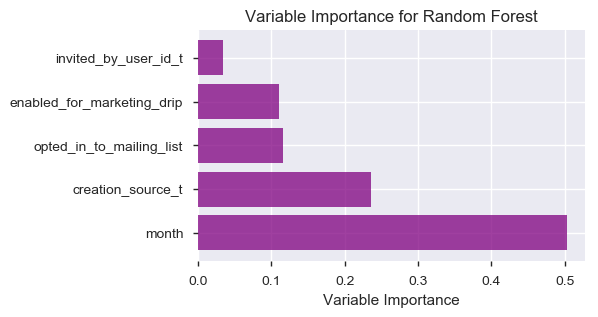

In [114]:
## Printing the Variable Importance Results 
count, ax = plt.subplots(figsize=(5,3))
plt.barh(importance.Features, importance.Importance, align='center', alpha=0.75, color='purple')
plt.xlabel('Variable Importance')
plt.title('Variable Importance for Random Forest')

plt.show()

In [115]:
## Calcuating the Confusion Matrix 
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[2308, 1395],
       [ 248,  249]], dtype=int64)

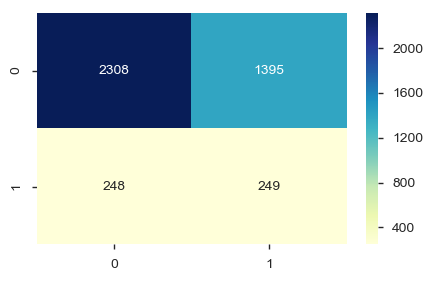

In [116]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

In [117]:
#############################################################################################################

In [155]:
## Creating the datset to be used for analysis 
df11 = df3[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'adopteduser', 
            'creation_source_t', 'invited_by_user_id_t']]

df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 5 columns):
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
adopteduser                   12000 non-null object
creation_source_t             12000 non-null object
invited_by_user_id_t          12000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 882.5+ KB


In [156]:
# separating our independent and dependent variable
X = df11.drop(['adopteduser'], axis = 1)
y = df11["adopteduser"]

In [120]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 0)

In [121]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features:   ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features:   ', X_test.shape[1])

Training Set:
Number of datapoints:  7800
Number of features:    4


Test Set:
Number of datapoints:  4200
Number of features:    4


In [122]:
## Logistic Model for Select Attributes
logreg = LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [123]:
## Calculating the Accuracy of the Model
y_pred = logreg.predict(X_test)
 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [124]:
## Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2394 1309]
 [ 271  226]]


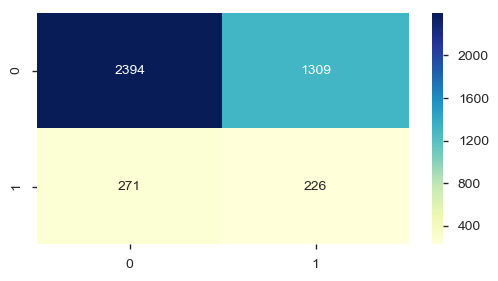

In [125]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(6,3))
sns.heatmap(confusion_matrix,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

In [126]:
## Logistic Classification Report for the Precision, Recall and F1 Score
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.65      0.75      3703
          1       0.15      0.45      0.22       497

avg / total       0.81      0.62      0.69      4200



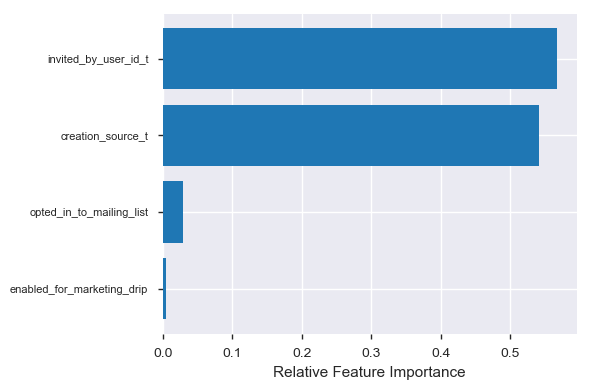

In [179]:
## Calcuating feature importance

feature_importance = logreg.coef_[0]
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(6,4))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [ ]:
########################################   The End    ################################################################

In [183]:
## Creating the datset to be used for analysis 
df12 = df3[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'adopteduser', 
            'creation_source_t', 'invited_by_user_id_t']]

df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 5 columns):
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
adopteduser                   12000 non-null object
creation_source_t             12000 non-null object
invited_by_user_id_t          12000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 882.5+ KB


In [184]:
# separating our independent and dependent variable
X = df12.drop(['adopteduser'], axis = 1)
y = df12["adopteduser"]

In [185]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 0)

In [186]:
# Feature Importance
# fit an Extra Trees model to the data
model2 = ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model2.fit(X, y)

# display the relative importance of each attribute
print(model.feature_importances_)

[0.03147279 0.02828625 0.86592827 0.07431269]


In [187]:
## Model specifications 
model2

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [189]:
## Calculating the Accuracy Rates
y_pred = model2.predict(X_test)
 
print('Accuracy of Extra Trees classifier on test set: {:.2f}'.format(model2.score(X_test, y_test)))

Accuracy of Extra Trees classifier on test set: 0.49


In [190]:
## Total number of columns or input variables for this algorithm
model.n_features_

4

In [191]:
## Printing the Model class for this run 
model.classes_

array(['0', '1'], dtype=object)

In [192]:
## Printing the column headers to finish the dataset 
X.head(1)

,opted_in_to_mailing_list,enabled_for_marketing_drip,creation_source_t,invited_by_user_id_t
0,1,0,2,1.0
